# 3.1. Linear Regression

## 3.1.1. Linear Model
Weighted sum of the features and a bias

## 3.1.2. Loss Function
The quality measurement

## 3.1.3. Analytic Solution
Linear Regression has analytic solution.

## 3.1.4. Minibatch Stochastic Gradient Decent
1. Initialize the value of model parameters randomly
2. Iteratively sample random minibatches from the data, compute the derivative(gradient) of the average loss
3. update the parameter in the direction of negative gradient

## 3.1.5. Vectorization for speed
Vectorize the calculations and leverage fast linear algebra libraries rather than for-loop

## 3.1.6. Linear Regression and Neural Networks
Linear Regression can be concluded as a 1 layer neural network.

# 3.2. Linear Regression from Scratch

## 3.2.1 Generating the Dataset


In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    # normal distribution
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    # noise
    y += torch.normal(0, 0.01, y.shape)
    # reshape y to 1 column
    return X, y.reshape((-1, 1))

In [6]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
true_w, true_b, features, labels

(tensor([ 2.0000, -3.4000]),
 4.2,
 tensor([[-0.6914, -0.7156],
         [ 0.1251,  0.8331],
         [-0.9568,  0.2577],
         ...,
         [-0.2063,  0.4157],
         [ 1.6301,  1.3700],
         [-1.1135,  0.4666]]),
 tensor([[ 5.2475e+00],
         [ 1.6208e+00],
         [ 1.4136e+00],
         [-2.5024e+00],
         [ 3.9287e+00],
         [ 7.6847e-01],
         [ 1.0544e+01],
         [-5.1169e-03],
         [-5.1916e-01],
         [ 6.8969e+00],
         [-2.5591e+00],
         [ 1.9743e+00],
         [ 4.2555e-01],
         [ 1.3403e+00],
         [-2.9077e+00],
         [ 1.8434e+01],
         [-8.7649e-01],
         [ 6.1154e-01],
         [ 6.4998e+00],
         [ 3.4621e+00],
         [-5.7210e+00],
         [ 6.5157e+00],
         [ 8.2528e+00],
         [-7.6401e-01],
         [ 1.4531e+00],
         [-5.8700e-01],
         [ 6.5019e+00],
         [ 1.4038e+01],
         [ 5.1329e+00],
         [ 6.5291e+00],
         [ 2.0832e+00],
         [ 4.6761e+00],
       

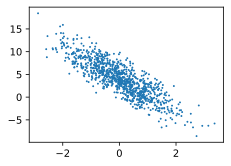

In [11]:
# The relationship between the second feature and label
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)], labels, 1)

## 3.2.2 Reading the dataset

In [13]:
# Read the dataset by batch
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    idx = list(range(num_examples))

    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        batch_idx = torch.tensor(idx[i: min(i+batch_size, num_examples)])
        yield features[batch_idx], labels[batch_idx]

## 3.2.3. Initializing Model Parameters

In [15]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[0.0012],
         [0.0167]], requires_grad=True),
 tensor([0.], requires_grad=True))

## 3.2.4. Define Model

In [19]:
def linreg(X, w, b):
    # broadcasting strategy will let it work
    return torch.matmul(X, w) + b

## 3.2.5. Define the Loss function

In [24]:
def square_loss(y, y_hat):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6. Defining the Optimization Algorithm

In [23]:
def sgd(params, lr, batch_size):
    # minibatch sgd
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [26]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # shape of l: [batch_size, 1]
        l.sum().backward()
        # Update parameters using their gradient
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss{float(train_l.mean())}')

epoch 1, loss0.05166910961270332
epoch 2, loss0.00022900488693267107
epoch 3, loss5.254721691017039e-05


In [27]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0003, -0.0010], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)


# 3.3. Linear Regression in Pytorch

## 3.3.1. Generating the dataset

In [28]:
import numpy as np
from torch.utils import data

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

## 3.3.2. Reading the dataset

In [29]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

## 3.3.3. Defining the Model

In [30]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

## 3.3.4. Initializing Model Parameters

In [31]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [36]:
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

## 3.3.5. Defining the Loss Function

In [33]:
loss = nn.MSELoss()

## 3.3.6. Defining the Optimization Algorithm

In [38]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## 3.3.7. Training
1. Generate prediction by calling net(X) and calculate the loss l(forward propagation)
2. Calculate gradients by running the backpropagation
3. Update the model parameters by optimizer

In [39]:
num_epochs = 3

for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000257
epoch 2, loss 0.000098
epoch 3, loss 0.000099


In [40]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([0.0013, 0.0002])
error in estimating b: tensor([-0.0007])


# 3.4. Softmax Regression

# 3.5. The Image Classification Dataset

In [41]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

## 3.5.1. Reading the DataSet

In [49]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)

In [50]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [57]:
# grayscale images: 28 x 28 pixels
mnist_train[0][0].shape, mnist_train[0][1]

(torch.Size([1, 28, 28]), 9)

In [58]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [59]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

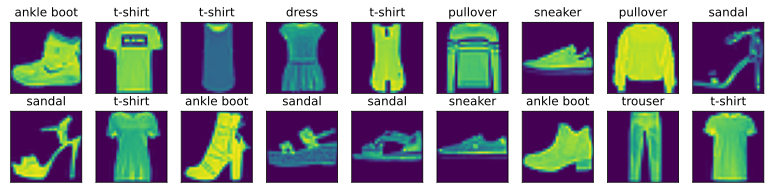

In [60]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

## 3.5.2. Reading a Minibatch

In [61]:
batch_size = 256

def get_dataloader_workers():
    """Use 4 processes to read the data."""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [63]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'8.43 sec'

## 3.5.3. Putting All Things Together

In [64]:
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [65]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
